In [1]:
from PIL import Image
import os
from os import walk
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
import csv
import random
import math
import operator
import pandas as pd

In [2]:
def color_histogram_of_test_image(test_src_image):
    # load the image
    image = test_src_image   
    chans = cv2.split(image)    
    colors = ('b', 'g', 'r')
    features = []
    feature_data = ''
    counter = 0
    for (chan, color) in zip(chans, colors):
        counter = counter + 1                
        
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        features.extend(hist)        
        # find the peak pixel values for R, G, and B
        elem = np.argmax(hist)        
        if counter == 1:
            blue = str(elem)
        elif counter == 2:
            green = str(elem)
        elif counter == 3:
            red = str(elem)
            feature_data = red + ',' + green + ',' + blue            

    with open('test.data', 'w') as myfile:
        myfile.write(feature_data)


def color_histogram_of_training_image(img_name):
    l=[]
    for root, dirs, files in walk('photoset'):                        
        if(root=='photoset'):            
            l=dirs
    l.remove('_query')
    
    for label in l:
        if label in img_name:
            data_source = label        
    # load the image
    image = cv2.imread(img_name)
    chans = cv2.split(image)
    colors = ('b', 'g', 'r')
    features = []
    feature_data = ''
    counter = 0
    for (chan, color) in zip(chans, colors):
        counter = counter + 1

        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])        
        features.extend(hist)        

        # find the peak pixel values for R, G, and B
        elem = np.argmax(hist)        
        if counter == 1:
            blue = str(elem)
        elif counter == 2:
            green = str(elem)
        elif counter == 3:
            red = str(elem)
            feature_data = red + ',' + green + ',' + blue
            
    
    with open('training.data', 'a') as myfile:
        myfile.write(feature_data + ',' + data_source + '\n')


def training():    
    for root, dirs, files in walk('photoset'):
        for f in files:            
            fs=root+"\\"+f
            if(root!= "photoset\_query"):
                color_histogram_of_training_image(fs)                




# calculation of euclidead distance
def calculateEuclideanDistance(variable1, variable2, length):
    distance = 0        
    for x in range(length):
        distance += pow(variable1[x] - variable2[x], 2)    
    return math.sqrt(distance)


# get k nearest neigbors
def kNearestNeighbors(training_feature_vector, testInstance, k):
    distances = []
    length = len(testInstance)
    for x in range(len(training_feature_vector)):
        dist = calculateEuclideanDistance(testInstance,training_feature_vector[x], length)
        distances.append((training_feature_vector[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])     
    return neighbors


# votes of neighbors
def responseOfNeighbors(neighbors):
    all_possible_neighbors = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]                
        if response in all_possible_neighbors:
            all_possible_neighbors[response] += 1
        else:
            all_possible_neighbors[response] = 1    
    sortedVotes = sorted(all_possible_neighbors.items(),
                         key=operator.itemgetter(1), reverse=True)    
    #return sortedVotes[0][0]
    return sortedVotes

    

# Load image feature data to training feature vectors and test feature vector
def loadDataset(
    filename,
    filename2,
    training_feature_vector=[],
    test_feature_vector=[],
    ):
    with open(filename) as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)        
        for x in range(len(dataset)):            
            for y in range(3):
                dataset[x][y] = float(dataset[x][y])                        
            training_feature_vector.append(dataset[x])

    with open(filename2) as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)        
        for x in range(len(dataset)):
            for y in range(3):
                dataset[x][y] = float(dataset[x][y])                
            test_feature_vector.append(dataset[x])


def main(training_data, test_data):
    training_feature_vector = []  # training feature vector
    test_feature_vector = []  # test feature vector
    loadDataset(training_data, test_data, training_feature_vector, test_feature_vector)
    classifier_prediction = []  # predictions
    # K value of k nearest neighbor
    k = 5
    for x in range(len(test_feature_vector)):      
        neighbors = kNearestNeighbors(training_feature_vector, test_feature_vector[x], k)        
        result = responseOfNeighbors(neighbors)        
        for r in result:
            classifier_prediction.append(r[0])
    return classifier_prediction[0]

In [3]:
def query_relevant(training_data, test_data):
    training_feature_vector = []  # training feature vector
    test_feature_vector = []  # test feature vector
    loadDataset(training_data, test_data, training_feature_vector, test_feature_vector)
    classifier_prediction = []  # predictions
    # K value of k nearest neighbor
    k = 10
    for x in range(len(test_feature_vector)):      
        neighbors = kNearestNeighbors(training_feature_vector, test_feature_vector[x], k)        
        result = responseOfNeighbors(neighbors)                    
    return result

loading...
Test image : photoset\_query\query_bicycle.jpg
Labeled : bicycle
Get 10 relevant data : [('tower', 3), ('strawberry', 2), ('bicycle', 2), ('statue of liberty', 1), ('building', 1), ('waterfront', 1)]
Detect image is: strawberry
precision:  0.2
recall:  0.1
prediction : FALSE


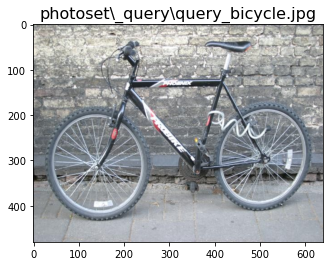

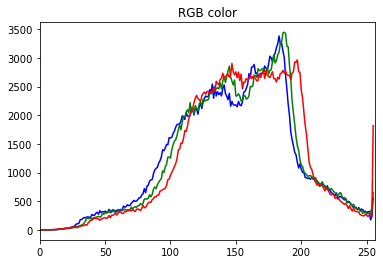


Test image : photoset\_query\query_greenery.jpg
Labeled : greenery
Get 10 relevant data : [('bicycle', 7), ('greenery', 2), ('tiger', 1)]
Detect image is: bicycle
precision:  0.2
recall:  0.1
prediction : FALSE


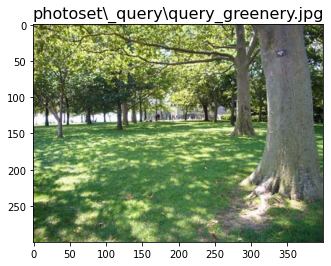

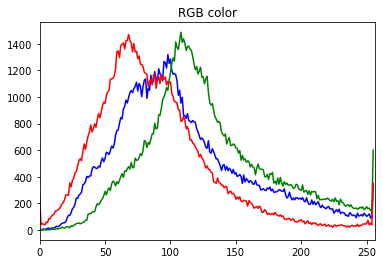


Test image : photoset\_query\query_panda.jpg
Labeled : panda
Get 10 relevant data : [('strawberry', 3), ('window', 2), ('panda', 1), ('sunflower', 1), ('greenery', 1), ('tiger', 1), ('tower', 1)]
Detect image is: panda
precision:  0.1
recall:  0.05
prediction : TRUE


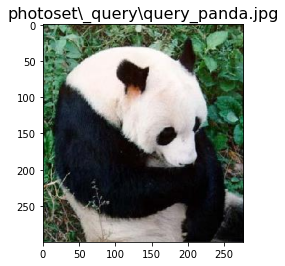

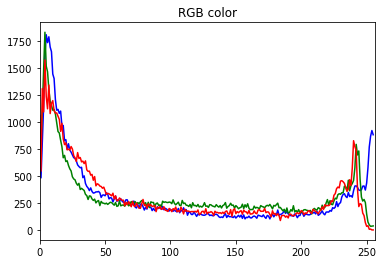


Test image : photoset\_query\query_sunflower.jpg
Labeled : sunflower
Get 10 relevant data : [('sunflower', 3), ('spongebob', 3), ('tiger', 2), ('tower', 1), ('greenery', 1)]
Detect image is: sunflower
precision:  0.3
recall:  0.15
prediction : TRUE


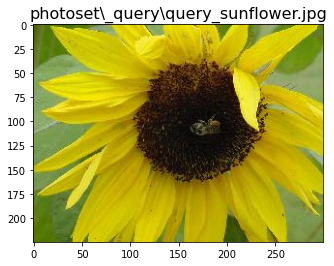

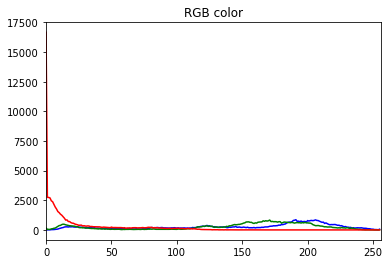

In [4]:
import cv2
import os
import os.path
import sys

targets=[]
for root, dirs, files in walk('photoset'):
    for f in files:
        fs=root+"\\"+f
        if(root== "photoset\_query"):
            targets.append(fs)     
            
# read the test image

prediction = 'n.a.'

# checking whether the training data is ready
PATH = './training.data'
if os.path.isfile(PATH) and os.access(PATH, os.R_OK):
    print('loading...')
else:
    training()
# get the prediction
#test_img='photoset/_query/query_panda.jpg'

for test_img in targets :     
    print('Test image :',test_img)    
    a=test_img.split('_')
    a=a[2]
    a=a[:-4]
    print('Labeled :',a)        
    source_image = cv2.imread(test_img)
    color_histogram_of_test_image(source_image)
    prediction = main('training.data', 'test.data')    
    relevant=query_relevant('training.data', 'test.data') 
    print('Get 10 relevant data :',relevant)
    print('Detect image is:', prediction)
    get=0
    count=0
    recall=0    
    for r in relevant:
        count+=r[1]
        if(r[0]==a):
            get=r[1]            
    precision=get/count
    recall=get/20
    print('precision: ',precision)   
    print('recall: ',recall)   
    PF=[]
    if str(prediction) in test_img:
        print('prediction : TRUE')
        PF.append('TRUE')
    else:
        print('prediction : FALSE')
        PF.append('FALSE')    
    plt.figure()
    queryimg_BGR=cv2.imread(test_img)
    queryimg_RGB = cv2.cvtColor(queryimg_BGR,cv2.COLOR_BGR2RGB)
    plt.title(test_img, fontsize=16)    
    plt.imshow(queryimg_RGB)
    plt.figure()
    color=('b','g','r')
    for i,col in enumerate(color):                
        hist_queryimg=cv2.calcHist([queryimg_RGB],[i],None,[256],[0,256])            
        plt.plot(hist_queryimg,color=col)
        plt.title('RGB color')
        plt.xlim([0,256])        
    plt.show()
    print()